
返回数据说明
参数名称	参数描述	说明
date	交易所行情日期	格式：YYYY-MM-DD
code	证券代码	格式：sh.600000。sh：上海，sz：深圳
open	今开盘价格	精度：小数点后4位；单位：人民币元
high	最高价	精度：小数点后4位；单位：人民币元
low	最低价	精度：小数点后4位；单位：人民币元
close	今收盘价	精度：小数点后4位；单位：人民币元
preclose	昨日收盘价	精度：小数点后4位；单位：人民币元
volume	成交数量	单位：股
amount	成交金额	精度：小数点后4位；单位：人民币元
pctChg	涨跌幅	精度：小数点后6位

In [1]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)


login success!
login respond error_code:0
login respond  error_msg:success


In [2]:

# 获取指数(综合指数、规模指数、一级行业指数、二级行业指数、策略指数、成长指数、价值指数、主题指数)K线数据
# 综合指数，例如：sh.000001 上证指数，sz.399106 深证综指 等；
# 规模指数，例如：sh.000016 上证50，sh.000300 沪深300，sh.000905 中证500，sz.399001 深证成指等；
# 一级行业指数，例如：sh.000037 上证医药，sz.399433 国证交运 等；
# 二级行业指数，例如：sh.000952 300地产，sz.399951 300银行 等；
# 策略指数，例如：sh.000050 50等权，sh.000982 500等权 等；
# 成长指数，例如：sz.399376 小盘成长 等；
# 价值指数，例如：sh.000029 180价值 等；
# 主题指数，例如：sh.000015 红利指数，sh.000063 上证周期 等；


# 详细指标参数，参见“历史行情指标参数”章节；“周月线”参数与“日线”参数不同。
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.600519",
    "date,code,open,high,low,close,preclose,volume,amount,pctChg",
    start_date='2020-01-01', end_date='2023-09-30', frequency="d")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

# 打印结果集
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
df = pd.DataFrame(data_list, columns=rs.fields)
# 结果集输出到csv文件
df.to_csv("./history_Index_k_data.csv", index=False)


# 登出系统
bs.logout()

query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
logout success!


In [4]:
# 计算OLHC列  
df['open'] = df['open'].astype(float)  
df['high'] = df['high'].astype(float)  
df['low'] = df['low'].astype(float)  
df['close'] = df['close'].astype(float)  
df['OLHC'] = (df['open'] + df['high'] + df['low'] + df['close'])/4
  
# 合并date列和OLHC列  
new_df = pd.concat([df['date'], df['pctChg'],df['close']], axis=1)  
new_df.to_csv("./maotai.csv", index=False)
print(new_df)  

           date     pctChg    close
0    2020-01-02  -4.480100  1130.00
1    2020-01-03  -4.552200  1078.56
2    2020-01-06  -0.052900  1077.99
3    2020-01-07   1.534300  1094.53
4    2020-01-08  -0.583800  1088.14
..          ...        ...      ...
905  2023-09-22   2.814200  1849.00
906  2023-09-25  -0.898900  1832.38
907  2023-09-26  -0.893900  1816.00
908  2023-09-27  -0.110100  1814.00
909  2023-09-28  -0.851700  1798.55

[910 rows x 3 columns]



Bad key text.latex.preview in file /home/frank/miniconda3/envs/condatest/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/frank/miniconda3/envs/condatest/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/frank/miniconda3/envs/condatest/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95    

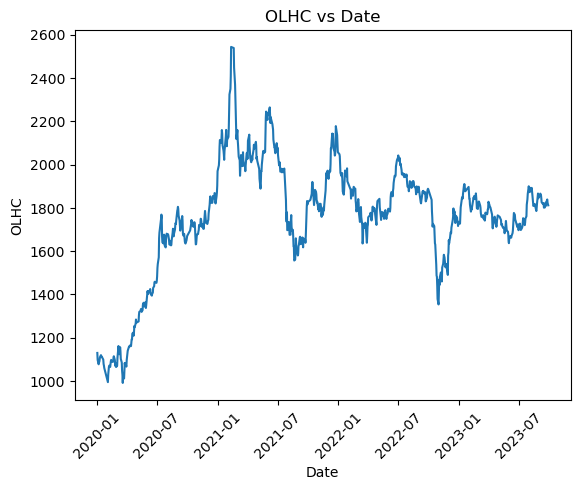

In [5]:
import pandas as pd  
import matplotlib.pyplot as plt  
  
  
# 将date列转换为日期类型  
df['date'] = pd.to_datetime(df['date'])  
  
# 绘制图表  
plt.plot(df['date'], df['OLHC'])  
plt.xlabel('Date')  
plt.ylabel('OLHC')  
plt.title('OLHC vs Date')  
  
# 旋转x轴标签，以便更好地显示日期  
plt.xticks(rotation=45)  
  
# 显示图表  
plt.show()  